In [38]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [2]:
#Sample random points in a closed 2D space using rejection sampling and visualise the results. 
#Try to make the density 'not uniform' in some way over the domain of points.

#generic steps of random sampling to approximate area under curve:
#---let Ntot = # throws
#if Ntot[i] is under the curve, 
#increment "Nexcept"
#then, approximate area under curve with Nexcept/Ntot
#plot value of fraction vs. sample number, as a nifty exercise

#for probability:
#begin with target distribution f(x) from which to sample
#introduce a "proposal" distribution, g(x)
#find factor "M" such that Mg(x) >= f(x) for every x in domain (bounds f(x) from above)
#draw random x according to proposal distribution
#draw another random number R between 0 and 1, uniformly distributed
#if R <= f(x)/Mg(x), accept (i.e., keep x)
#else, reject
#repeat

Area Under Curve = 0.462


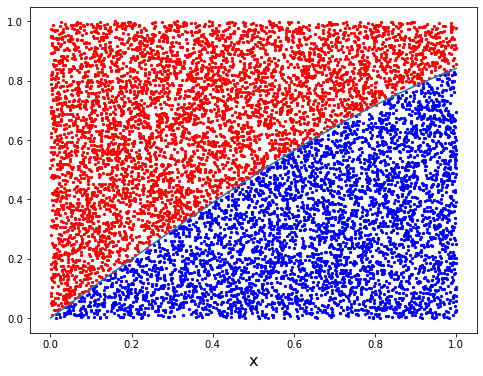

In [124]:
Nsample = 10000

#plotting f(x)
plt.figure(figsize=(8,6))
x = np.linspace(start=0,stop=1,num=Nsample)
fx = np.sin(x)

#restricting y-range, in case f(x) extends beyond 1
#fx_flag = (fx<=1)
#fx = fx[fx_flag]
# x[y_flag] ensures x and y are identical length arrays
#x = x[fx_flag]


plt.plot(x,fx)
plt.xlabel('x',fontsize=16)

#generate two random numbers between 0 and 1 (uniformly distributed)
R_list = []
accept = 0
for i in range(0,Nsample):
    R_num = random.random()
    R_list.append(R_num)
    
    
    
for i in range(0,len(x)):
    if R_list[i] <= np.sin(x[i]):
        plt.scatter(x[i],R_list[i],color='b',s=5)
        accept = accept + 1
        
    else:
        plt.scatter(x[i],R_list[i],color='r',s=5)
        

#if R <= f(x)/Mg(x), accept
#else, reject
#repeat
#plt.hist(accept_list,bins=100,density=True)
print('Area Under Curve =','%.3f'%(accept/Nsample))

In [ ]:
#Nsample 1000, area under curve = 0.470
#Nsample 2000, area under curve = 0.464
#Nsample 3000, area under curve = 0.457
#Nsample 10000, area under curve = 0.462

#Accepted value (Wolframalpha) = 0.45970

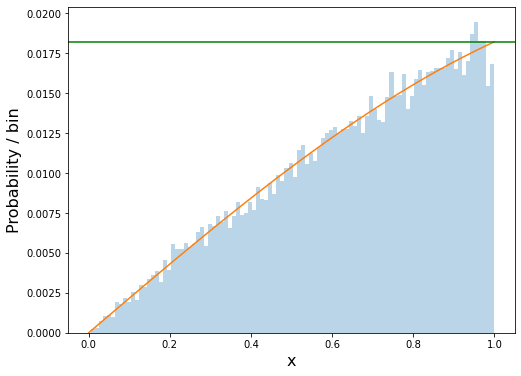

In [202]:
Nsample = 50000
Xmin = 0.
Xmax = 1.     #np.arccos(-1)

def PlotSin(x,bin_width):
    return (bin_width*np.sin(x)/(np.cos(Xmin) - np.cos(Xmax)))

x = np.linspace(start=0,stop=1,num=Nsample)
fx = np.sin(x)
gx = np.max(fx)

plt.figure(figsize=(8,6))
#plt.plot(x,fx)
#plt.axhline(gx,color='r')

#R random number drawn from proposal function...since g(x) uniformly distributed between 0 and 1 (straight
#line), simply use random.random().
R_list = []
x_list = []
accept_list = []
accept = 0

for i in range(0,Nsample):
    R_num = random.random()
    R_list.append(R_num)
    x_num = random.random()
    x_list.append(x_num)


for i in range(0,Nsample):
    if R_list[i] <= np.sin(x_list[i])/gx:
        accept_list.append(x_list[i])
        accept = accept + 1
    else:
        continue

        
#the following is adapted from python version of prof. Rogan's code.        
#np.ones_like(list) gives an array (length list) with 1 elements
weights = np.ones_like(accept_list) / len(accept_list)



#note: density=True ensures the area underneath the curve sums to one; it does NOT normalize the heights!
n = plt.hist(accept_list,weights=weights,alpha=0.3,label="samples from f(x)",bins=100)
#note: hist_max = max(n[0])



plt.ylabel("Probability / bin",fontsize=16)
plt.xlabel("x",fontsize=16)




#map is a built-in python command! The following is an example of its use, since the definition is a bit
#tricky to grasp without a concrete demonstration (essentially, map precludes the need for an explicit
#"for" loop):

#          def square(number):
#              return number**2
#          numbers = [1,2,3,4,5]
#          squared = map(sqare,numbers)

#list(squared) will return [1,4,9,16,25]  



#not too sure why multiplying by bin width is necessary for normalizing the distribution curve; but alas.
bin_width = n[1][1] - n[1][0]

#creates list of fx*bin_width normalized by integral of fx from 0 to 1. Did so analytically here (and for
#gx; hwoever, for a more involved function, a numerical approach may be more appropriate).
y_norm = list(map(PlotSin,x,np.ones_like(x)*bin_width))     #fx*bin_width


#normalize g(x) according to the integral of sin(x) from 0 to 1.
plt.plot(x,y_norm)
plt.axhline(gx*bin_width/(np.cos(Xmin) - np.cos(Xmax)),color='g')